In [1]:
import cv2
from fer import FER
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt 
%matplotlib inline
import os

In [2]:
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)

In [3]:
emo_detector = FER(mtcnn=True)
img_counter = 0

In [4]:
while True:
    ret,frame = cam.read()
    dominant_emotion, emotion_score = emo_detector.top_emotion(frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_haar_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
         cv2.rectangle(frame, (x,y) , (x+w,y+h), (255,255,255), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,
        dominant_emotion,
        (50,50),
        font,3,
        (255,255,255),
        2,
        cv2.LINE_4)
    cv2.imshow('original video',frame)
    
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()
    
    

1/1 [==============================] - 0s 25ms/step
Escape hit, closing...


None


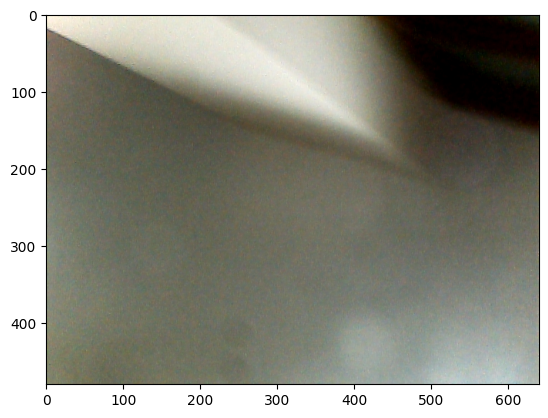

In [5]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
print(dominant_emotion)

In [6]:
driver = webdriver.Chrome('./sources/chromedriver.exe')
if dominant_emotion == "happy":
    driver.get("https://open.spotify.com/playlist/4nd7oGDNgfM0rv28CQw9WQ")

elif dominant_emotion == "sad":
    driver.get("https://open.spotify.com/playlist/1jJoJu3y2v0pl2fQb4FpcR")
    
elif dominant_emotion == "angry":
    driver.get("https://open.spotify.com/playlist/2SAlj6IpdtsyI7qqU0ZKb2")
    
elif dominant_emotion == "fear":
    driver.get("https://open.spotify.com/album/1KwWAVnZPhsc9QlQGrM702")
    
elif dominant_emotion == "disgust":
    driver.get("https://open.spotify.com/playlist/7diEjS9gADBgVpDww9J1r3")
    
elif dominant_emotion == "neutral":
    driver.get("https://open.spotify.com/playlist/0ffnLxCftwLzmXDO7DJEXc")
    
elif dominant_emotion == "surprise":
    driver.get("https://open.spotify.com/playlist/2dBjcjjYckHQlrn8iHm7c1")

else:
    print("no face detected") 

C:\Users\Dark\AppData\Local\Temp\ipykernel_1480\2207285323.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./sources/chromedriver.exe')


no face detected
